# Global Climate Change

### Author : Ashwin Rathore
### KU ID: 3026425

## Time Series Forecasting
- We are going to predict the fututre weather based on the previous years data using ARIMA model.


# Step 1: Set up the environment:
- Import all CSV files required

#### Step 1: Imort data from Demand.csv into pandas dataframe

In [30]:
import pandas as pd
data = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Russia_history_data.csv')
data1 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Australia_history_data.csv')
data2 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\UK_history_data.csv')
data3 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Usa_history_data.csv')

Merging all countries data

In [31]:
data= data.append(data1)
data= data.append(data2)
data= data.append(data3)
data.head(2)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast


Replacing countries names for Convenience.

In [32]:
data=data.replace('russia', 'Russia')
data=data.replace('uk', 'UK')
data=data.replace('australia', 'Australia')
data=data.replace('United States', 'United_States')
data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


#### Step 2: Data Analysis and Feature Engineering

Check the number of samples in the dataset

In [33]:
data.shape

(72606, 15)

We have 72606 samples in this dataset. 
Let's drop both the irrelevant columns and look at the dataset.

In [34]:
data.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill             33049
Heat Index             62846
Precipitation              0
Snow Depth             64523
Wind Speed                 0
Wind Gust              67827
Visibility              1141
Cloud Cover                3
Relative Humidity          0
Conditions                 0
dtype: int64

In [35]:
data = data.drop(["Wind Chill", "Heat Index", "Snow Depth", "Wind Gust"],axis='columns')

Lets check the null values in the data

In [36]:
data.isnull().sum()

Name                      0
Date time                 0
Maximum Temperature       0
Minimum Temperature       0
Temperature               0
Precipitation             0
Wind Speed                0
Visibility             1141
Cloud Cover               3
Relative Humidity         0
Conditions                0
dtype: int64

Lets remove the null values

In [37]:
data.dropna(subset = ["Visibility"], inplace=True)
data.dropna(subset = ["Cloud Cover"], inplace=True)
data.isnull().sum()

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64

Let's see what else we can do with the data

In [38]:
data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast


Lets rename the columns as the space in the column name will create error.

In [39]:
data.rename(columns={'Date time': 'Date', 'Maximum Temperature': 'Maximum_Temperature','Minimum Temperature': 'Minimum_Temperature','Wind Speed': 'Wind_Speed','Cloud Cover': 'Cloud_Cover','Relative Humidity': 'Relative_Humidity'}, inplace=True)
data

,Name,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Precipitation,Wind_Speed,Visibility,Cloud_Cover,Relative_Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,0.00,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,0.00,18.3,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,0.00,18.3,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,0.00,16.1,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,0.00,16.1,2.7,100.0,92.43,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
18540,United_States,10/28/2020,69.7,61.6,65.3,0.00,11.9,8.6,42.1,87.16,Partially cloudy
18541,United_States,10/29/2020,63.5,52.9,58.3,2.25,16.4,6.4,57.1,91.80,"Rain, Partially cloudy"
18542,United_States,10/30/2020,53.8,48.6,50.9,0.31,20.5,9.7,89.3,76.92,"Rain, Overcast"
18543,United_States,10/31/2020,49.6,40.5,46.6,0.00,14.3,9.9,86.7,69.44,Overcast


In the Date feature, the format of date is dd-mm-yy which is not acceptable in the Forecasting model so we need to convert it into yyyy-mm-dd.

First we will split the date on the basis of "/" in to three columns.

In [40]:
Date=data.Date.str.split("/",expand=True) 
Date.head(3)

,0,1,2
0,01,01,1970
1,01,02,1970
2,01,03,1970


Now we will combine year and month columns in the format yyyy-mm by concatenating them.

In [41]:
Date['Combined'] = Date[2].str.cat(Date[0],sep="-")
Date.head(3)

,0,1,2,Combined
0,01,01,1970,1970-01
1,01,02,1970,1970-01
2,01,03,1970,1970-01


Now we will concatenate the "-01" at the end of every combined value which gives us yyyy-mm-dd format of date. The reason behind adding the 01 as the day is that we will be predicting the demand of product for the upcoming month based on the previous months and have different dates of the same month doesn't make any difference.

In [42]:
Date['Combined'] = Date['Combined'].astype(str)+"-01"
Date

,0,1,2,Combined
0,01,01,1970,1970-01-01
1,01,02,1970,1970-01-01
2,01,03,1970,1970-01-01
3,01,04,1970,1970-01-01
4,01,05,1970,1970-01-01
...,...,...,...,...
18540,10,28,2020,2020-10-01
18541,10,29,2020,2020-10-01
18542,10,30,2020,2020-10-01
18543,10,31,2020,2020-10-01


Now we replace the Date feature's values in our original dataframe with the new date format

In [43]:
data['Date'] =  Date['Combined']
data.dtypes

Name                    object
Date                    object
Maximum_Temperature    float64
Minimum_Temperature    float64
Temperature            float64
Precipitation          float64
Wind_Speed             float64
Visibility             float64
Cloud_Cover            float64
Relative_Humidity      float64
Conditions              object
dtype: object

The Date feature has a datatype of object as we can see above and we need datetime64 to feed the data in to the models so we change it.

In [44]:
data['Date']=data['Date'].astype('datetime64[ns]')
data.dtypes

Name                           object
Date                   datetime64[ns]
Maximum_Temperature           float64
Minimum_Temperature           float64
Temperature                   float64
Precipitation                 float64
Wind_Speed                    float64
Visibility                    float64
Cloud_Cover                   float64
Relative_Humidity             float64
Conditions                     object
dtype: object

Let's look at the data again and see what else we can do.

In [45]:
data.head(5)

,Name,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Precipitation,Wind_Speed,Visibility,Cloud_Cover,Relative_Humidity,Conditions
0,Russia,1970-01-01,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,1970-01-01,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast
2,Russia,1970-01-01,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast
3,Russia,1970-01-01,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast
4,Russia,1970-01-01,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast


Now we take the mean of the temperature for the month for all 4 countries

In [46]:
df = data.groupby(['Name','Date'])['Temperature'].mean().reset_index()
df

,Name,Date,Temperature
0,Australia,1973-01-01,72.190323
1,Australia,1973-02-01,68.244444
2,Australia,1973-03-01,62.383871
3,Australia,1973-04-01,56.826667
4,Australia,1973-05-01,48.796774
...,...,...,...
2349,United_States,2020-07-01,83.187097
2350,United_States,2020-08-01,78.925806
2351,United_States,2020-09-01,70.356667
2352,United_States,2020-10-01,61.493548


Now we convert the data frame with columns as countries, Date as index and temperature as values.

In [47]:
df=df.pivot(index='Date', columns='Name', values='Temperature')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,13.977419,NaN,30.312903
1970-02-01,NaN,17.900000,NaN,37.192857


Now we take temperature data for united states

In [48]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    30.312903
1970-02-01    37.192857
Name: United_States, dtype: float64

Drop any null values if there

In [49]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    30.312903
1970-02-01    37.192857
Name: United_States, dtype: float64

Importing Seaborn and pyplot for plotting graphs

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Taking yearly average of the data

In [51]:
df4=df2.resample('AS').mean()

Now we will plot the average of monthly temperature and yearly temperature.

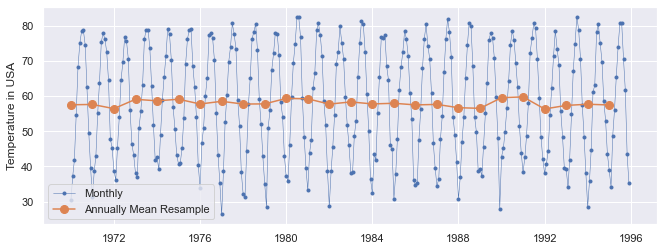

In [52]:
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_USA1.png')

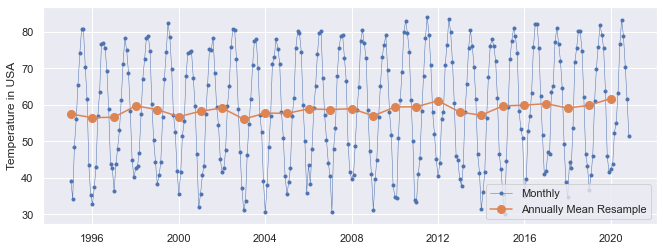

In [53]:
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_USA2.png')

We split the data in to training and testing. We will consider data of last four year as testing

In [54]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

563 48


We convert the training data in to Series

In [55]:
history = [x for x in train]
history
predictions=[]

We add the indexes for an year in advance to forecast future temperature

In [56]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

We fit the ARIMA model with paramaters (5, 1, 0) and predict the temperature month by month

In [57]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


We split the data in to training and testing. We will consider data of last four year as testing

Now we are Plotting the predicted average temperature vs the Actual average temperature.

Test RMSE: 5.455


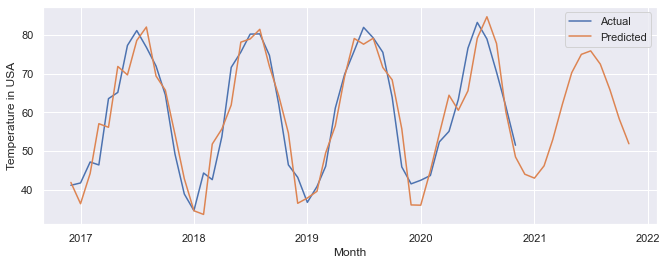

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Temp.png')
plt.legend()

We do the same process for Russia's Analysis and Temperature prediction

In [59]:
df2 = df['Russia'].copy()

In [60]:
df2=df2.dropna()

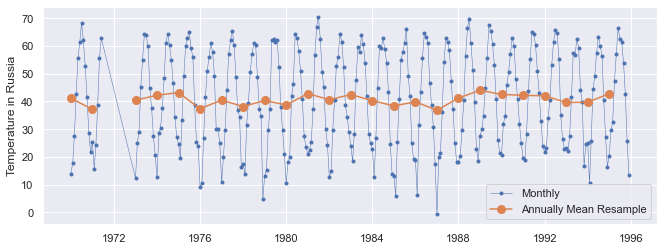

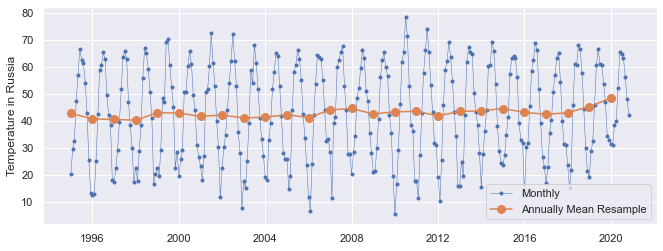

In [61]:
df4=df2.resample('AS').mean()
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_Russia2.png')

In [62]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

545 48


In [63]:
history = [x for x in train]
history
predictions=[]

In [64]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

In [65]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 6.584


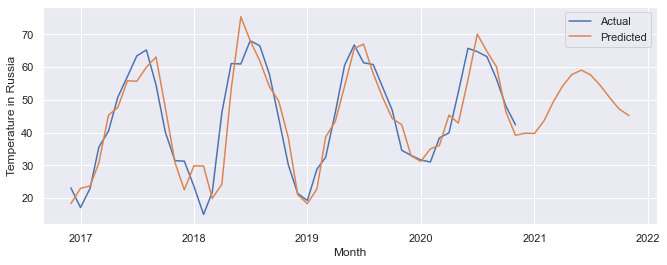

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_Temp.png')
plt.legend()

We do same process for UK's Analysis and Temperature prediction

In [67]:
df2 = df['UK'].copy()
df2=df2.dropna()
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)
history = [x for x in train]
history
predictions=[]

527 48


In [68]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

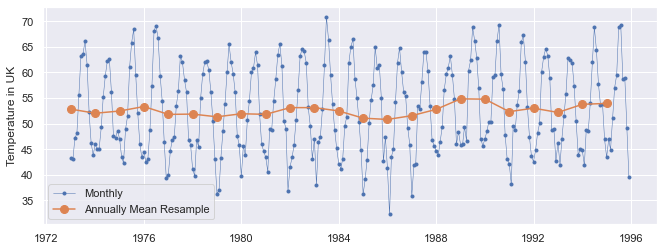

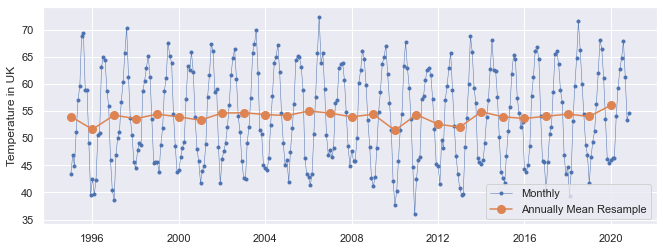

In [69]:
df4=df2.resample('AS').mean()
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_UK2.png')

In [70]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 3.625


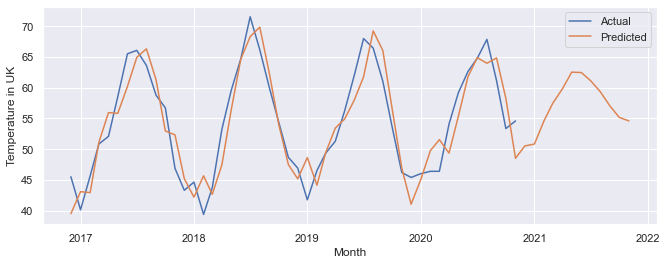

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_Temp.png')
plt.legend()

We do same process for UK's Analysis and Temperature prediction

In [72]:
df2 = df['Australia'].copy()
df2=df2.dropna()
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)
history = [x for x in train]
history
predictions=[]

527 48


In [73]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

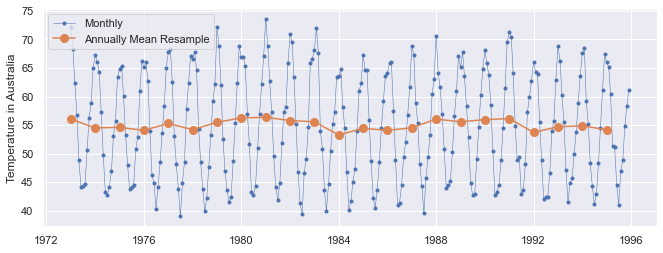

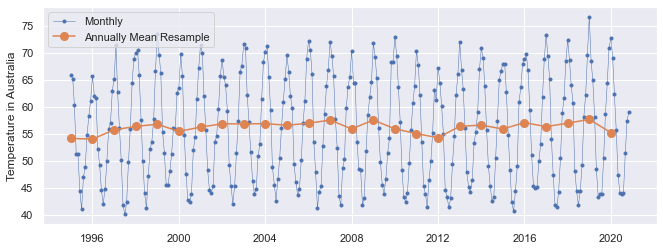

In [74]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Temp_Australia2.png')

In [75]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 2.595


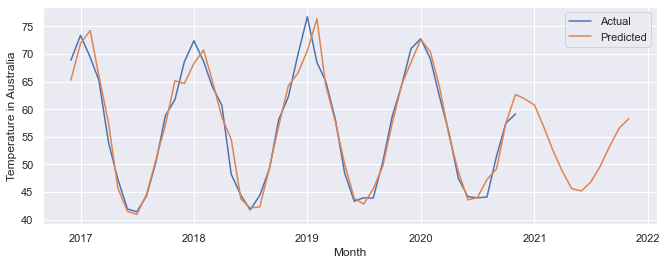

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature in Australia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_Temp.png')
plt.legend()

Now we take the Precipitation data for all 4 countries and plot the analysis and prediction same as done for the temperature

In [77]:
df = data.groupby(['Name','Date'])['Precipitation'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Precipitation')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,0.0,NaN,0.040968
1970-02-01,NaN,0.0,NaN,0.097500


In [78]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    0.040968
1970-02-01    0.097500
Name: United_States, dtype: float64

In [79]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    0.040968
1970-02-01    0.097500
Name: United_States, dtype: float64

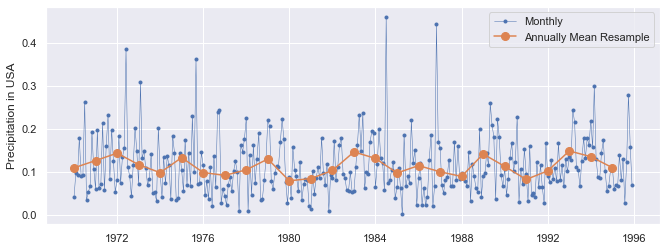

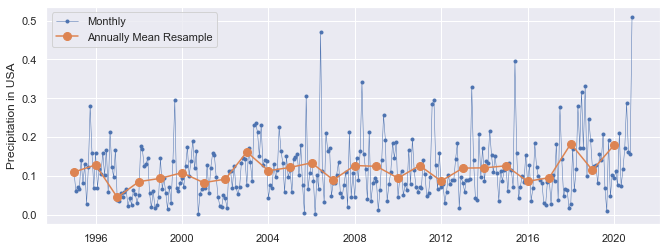

In [80]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_USA2.png')


In [81]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

563 48


In [82]:
history = [x for x in train]
history
predictions=[]

In [83]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

In [84]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 0.095


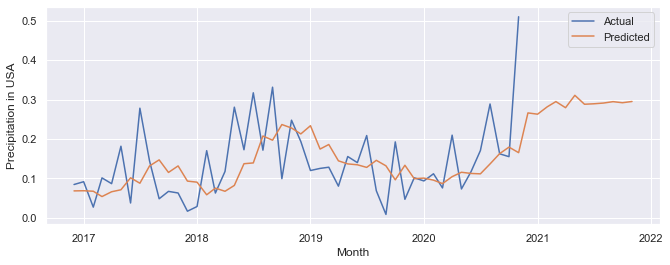

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Precipitation in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Prec.png')
plt.legend()

In [86]:
df2 = df['Russia'].copy()
df2.head(2)

Date
1970-01-01    0.0
1970-02-01    0.0
Name: Russia, dtype: float64

In [87]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    0.0
1970-02-01    0.0
Name: Russia, dtype: float64

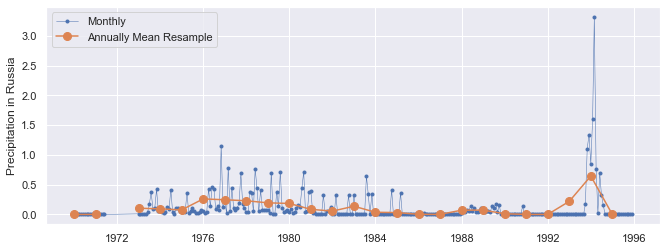

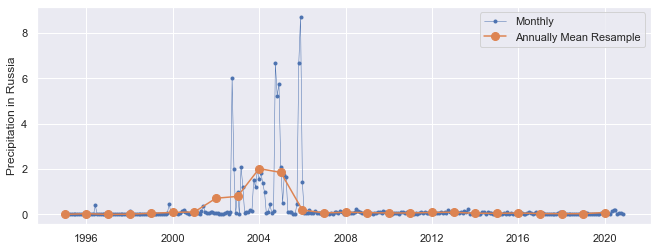

In [88]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_Russia2.png')

In [89]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

545 48


In [90]:
history = [x for x in train]
history
predictions=[]

In [91]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

In [92]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 0.043


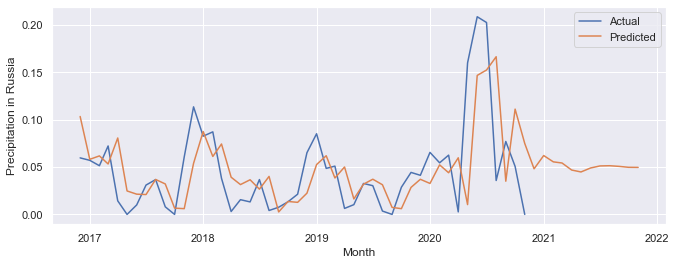

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Precipitation in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_Prec.png')
plt.legend()

In [94]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    0.001613
1973-02-01    0.003214
Name: UK, dtype: float64

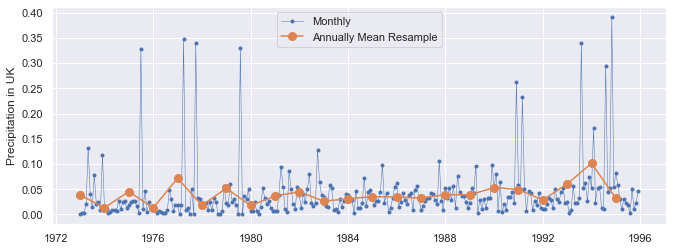

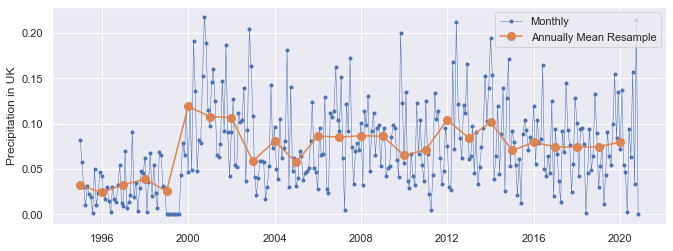

In [95]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_UK2.png')

527 48
Test RMSE: 0.050


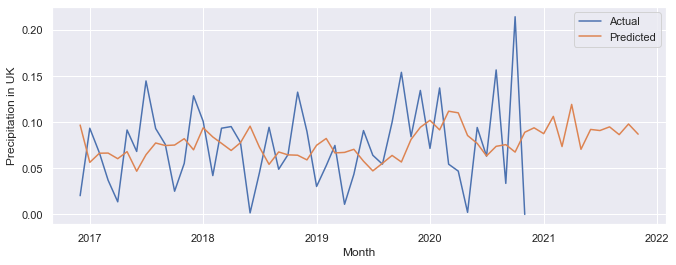

In [96]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Precipitation in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_Prec.png')
plt.legend()

In [97]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    0.0
1973-02-01    0.0
Name: Australia, dtype: float64

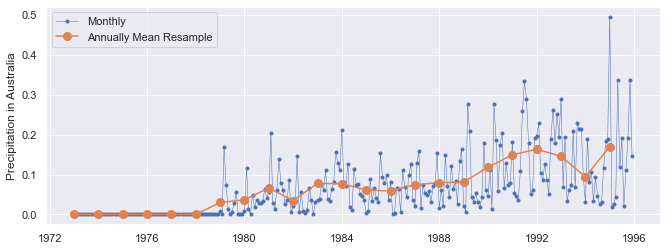

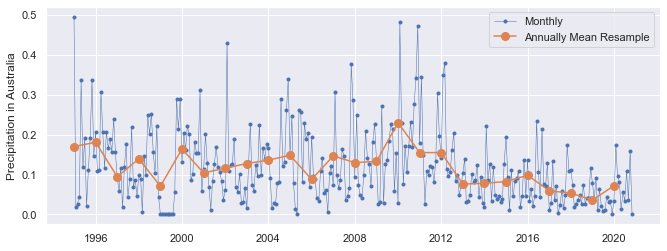

In [98]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Prec_Australia2.png')

527 48
Test RMSE: 0.051


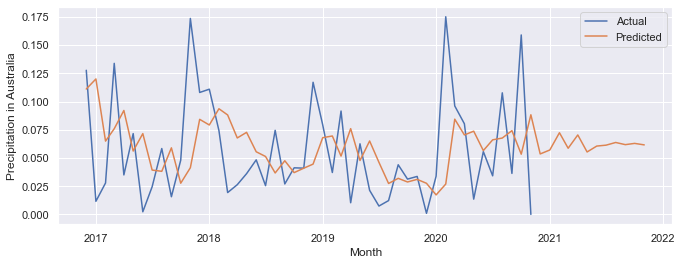

In [99]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Precipitation in Australia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_Prec.png')
plt.legend()

Now we take Wind Speed data for all four countries and Analyze and predict the data using ARIMA model.

In [100]:
df = data.groupby(['Name','Date'])['Wind_Speed'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Wind_Speed')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,12.180645,NaN,15.877419
1970-02-01,NaN,13.546429,NaN,17.896429


In [101]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    15.877419
1970-02-01    17.896429
Name: United_States, dtype: float64

In [102]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    15.877419
1970-02-01    17.896429
Name: United_States, dtype: float64

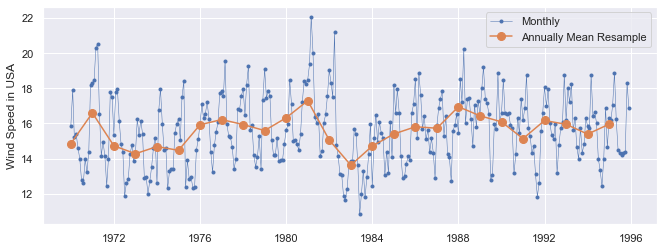

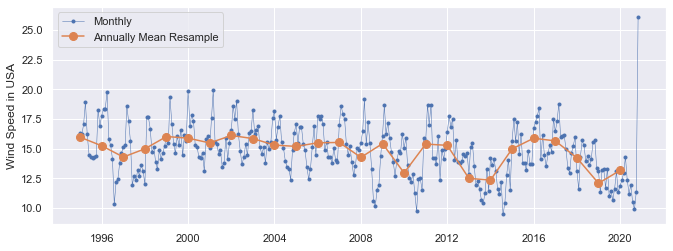

In [103]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_USA2.png')

In [104]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

563 48


In [105]:
history = [x for x in train]
history
predictions=[]

In [106]:
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

In [107]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])


Test RMSE: 2.593


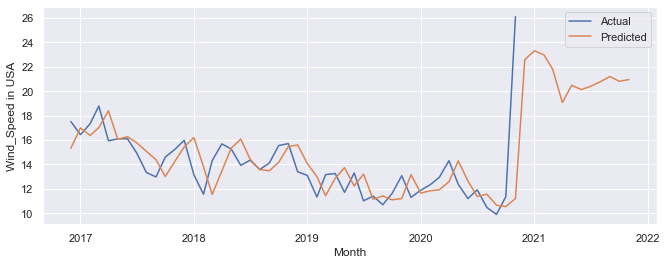

In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Wind_Speed in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_WindSpeed.png')
plt.legend()

In [109]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    12.180645
1970-02-01    13.546429
Name: Russia, dtype: float64

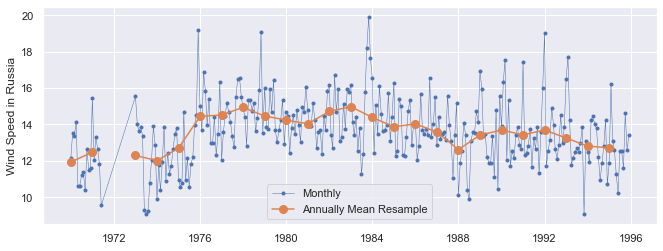

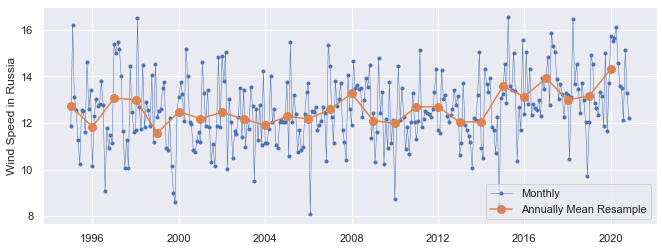

In [110]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_Russia2.png')

545 48
Test RMSE: 1.493


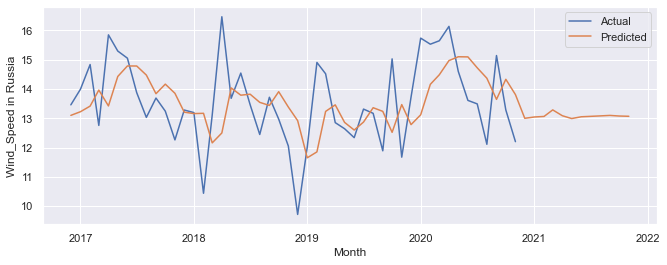

In [111]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Wind_Speed in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_WindSpeed.png')
plt.legend()

In [112]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)



527 48


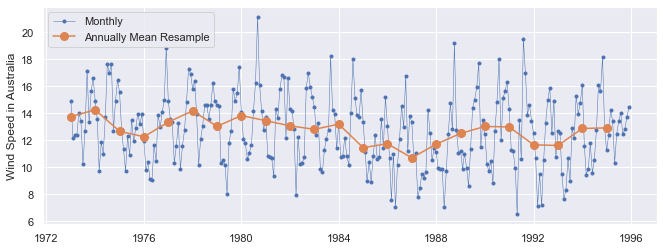

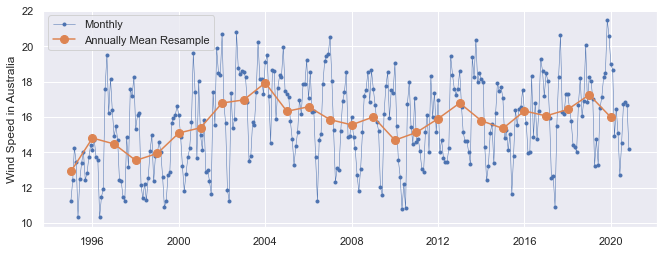

In [113]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_Australia2.png')

Test RMSE: 1.988


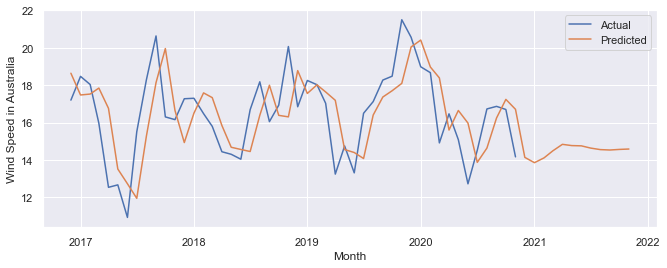

In [114]:
history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Wind Speed in Australia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_WindSpeed.png')
plt.legend()

In [115]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    14.677419
1973-02-01    16.467857
Name: UK, dtype: float64

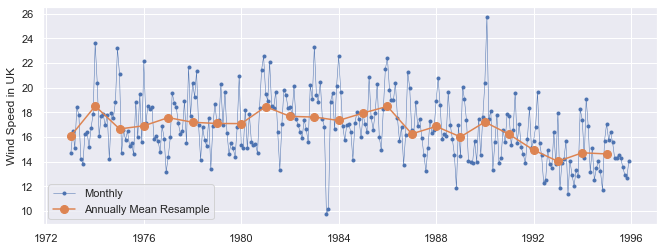

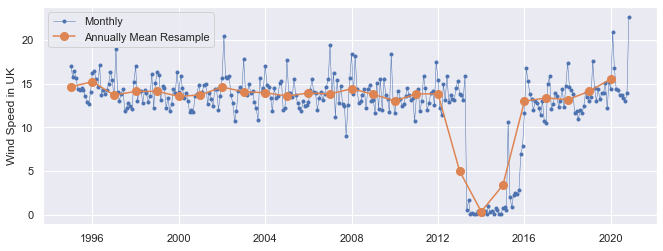

In [116]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Wind_UK2.png')

527 48
Test RMSE: 2.241


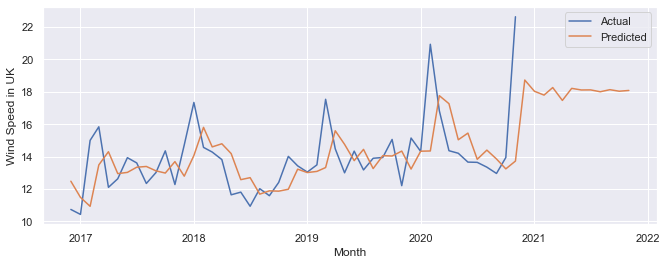

In [117]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Wind Speed in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_WindSpeed.png')
plt.legend()

Now we take the Relative Humidity data and Analyze and predict the values for future

In [118]:
df = data.groupby(['Name','Date'])['Relative_Humidity'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Relative_Humidity')
df.head(2)

df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    58.032581
1970-02-01    57.245000
Name: United_States, dtype: float64

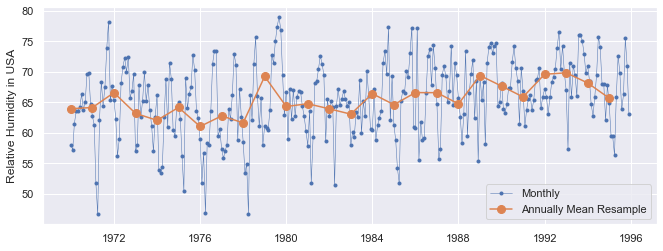

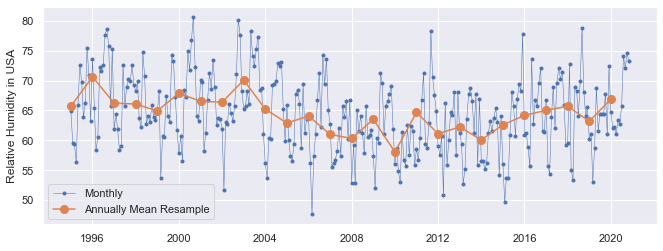

In [119]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_UK2.png')

563 48
Test RMSE: 6.135


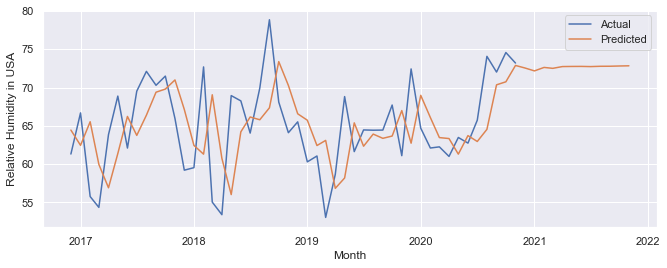

In [120]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Relative Humidity in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Humidity.png')
plt.legend()

In [121]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    88.835806
1970-02-01    82.651429
Name: Russia, dtype: float64

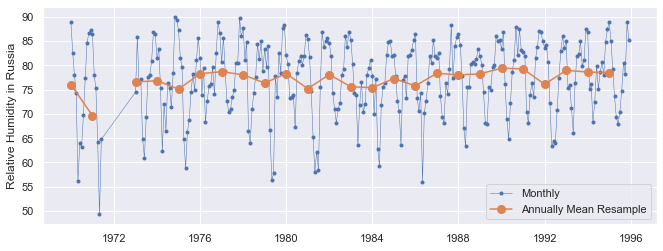

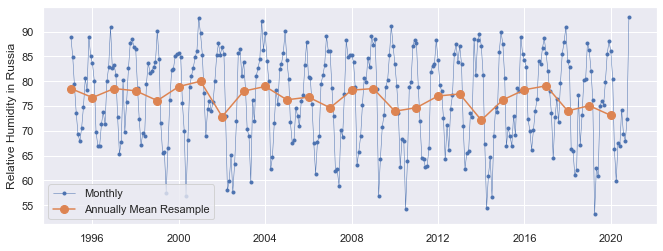

In [122]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_Russia2.png')

545 48
Test RMSE: 7.737


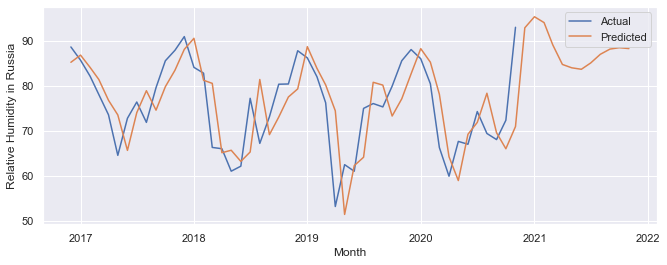

In [123]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Relative Humidity in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_Humidity.png')
plt.legend()

In [124]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    56.125806
1973-02-01    71.166296
Name: Australia, dtype: float64

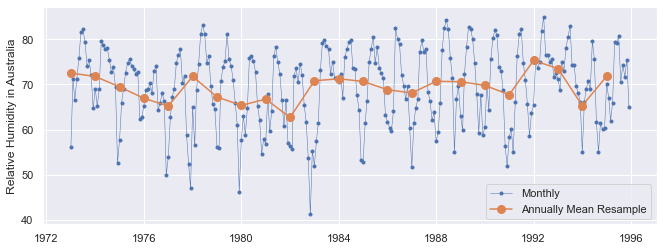

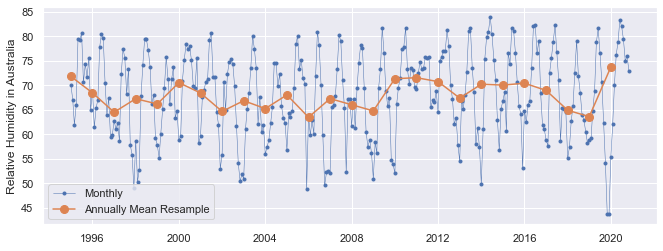

In [125]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_Australia.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_Australia.png')

527 48
Test RMSE: 5.152


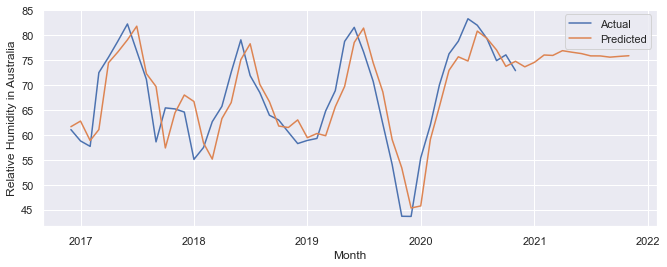

In [126]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Relative Humidity in Australia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_Humidity.png')
plt.legend()

In [127]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    81.517742
1973-02-01    74.426071
Name: UK, dtype: float64

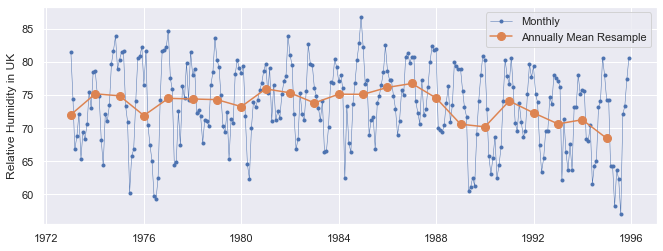

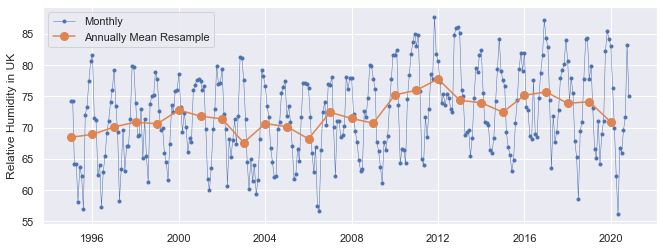

In [128]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\RelHum_UK2.png')

527 48
Test RMSE: 5.379


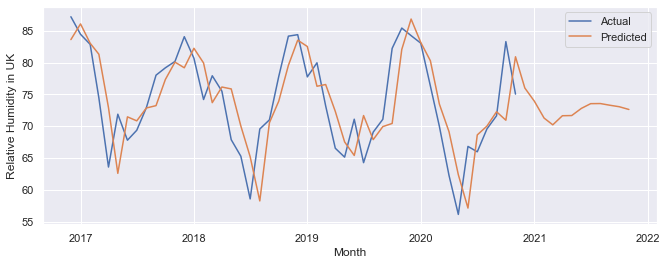

In [129]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Relative Humidity in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_Humidity.png')
plt.legend()

Now we analyze and predict the future values for Visibility for all four countries.

In [130]:
df = data.groupby(['Name','Date'])['Visibility'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Visibility')
df.head(2)

df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

Date
1970-01-01    11.041935
1970-02-01    11.228571
Name: United_States, dtype: float64

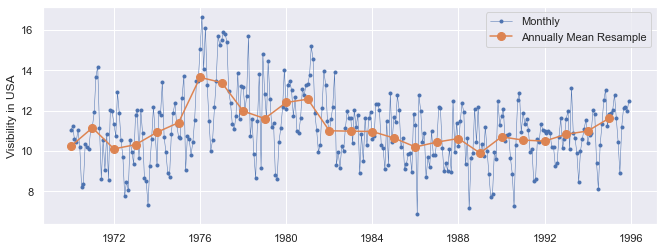

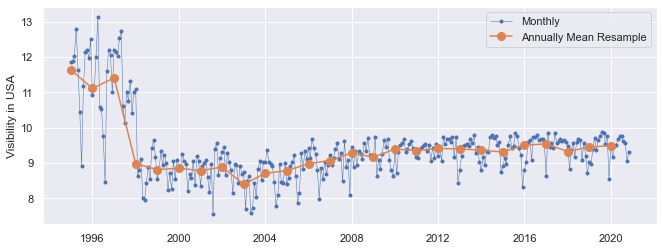

In [131]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_USA2.png')

563 48
Test RMSE: 0.358


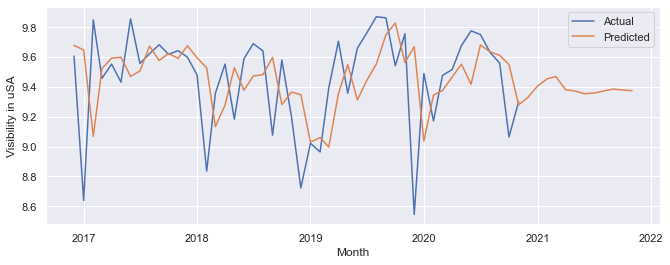

In [132]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Visibility in uSA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Visibility.png')
plt.legend()

In [133]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    3.845161
1970-02-01    4.414286
Name: Russia, dtype: float64

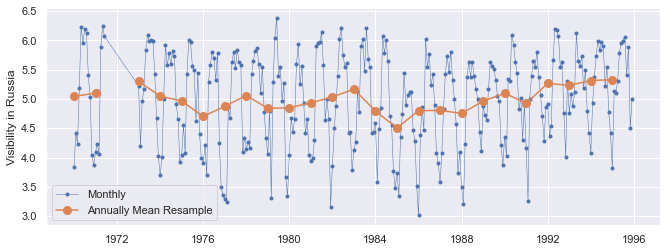

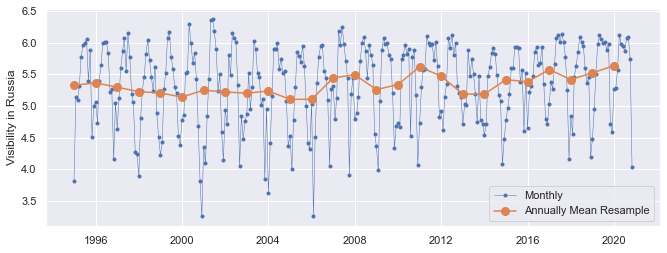

In [134]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Russia')
ax.legend()

fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_Russia2.png')

In [ ]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Visibility in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_Visibility.png')
plt.legend()

545 48


In [ ]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_UK2.png')

In [ ]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]
ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Visibility in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_Visibility.png')
plt.legend()

In [ ]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\Visibiilty_Australia2.png')

In [ ]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Visibility in Australia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_Visibility.png')
plt.legend()

Now we analyze and predict values for Cloud Cover for all 4 countries same as above

In [ ]:
df = data.groupby(['Name','Date'])['Cloud_Cover'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Cloud_Cover')
df.head(2)


In [ ]:
df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in USA')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_USA2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Cloud_Cover in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Cloud.png')
plt.legend()

In [ ]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Russia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_Russia2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)


from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Cloud_Cover in Russia")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Russia_Cloud.png')
plt.legend()

In [ ]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in UK')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_UK2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Cloud Cover in UK")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\UK_Cloud.png')
plt.legend()

In [ ]:

df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



In [ ]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\EDA\CloudCover_Australia2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2016-12-01', periods=60, freq='MS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<48):
		history.append(test[t])
	else:
		history.append(yhat[0])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Cloud_Cover in Australi")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Australia_Cloud.png')
plt.legend()

Now we import the Global Fuel consumtion data from csv. It contains the global yearly consumption of Coal, Oil and Gas

In [ ]:
import pandas as pd
data = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\world\data\Fossil_Fuels\global-fossil-fuel-consumption.csv')

Let's rename the columns to feed the data to the series

In [ ]:
data.rename(columns={'Coal (TWh; direct energy)': 'Coal', 'Oil (TWh; direct energy)': 'Oil','Gas (TWh; direct energy)': 'Gas'}, inplace=True)
data.dtypes

Now we will concatenate the "-01-01" at the end of every year which gives us yyyy-mm-dd format of date. The reason behind adding the -01-01 as the day is that we will be predicting the consumption for the upcoming year based on the previous years and need the correct Date format for the same.

In [ ]:
data['Year'] = data['Year'].astype(str)+"-01-01"
data

The Date feature has a datatype of object as we can see above and we need datetime64 to feed the data in to the models so we change it.

In [ ]:
data['Year']=data['Year'].astype('datetime64[ns]')
data.dtypes

Now we set the Year as index.

In [ ]:
data=data.set_index('Year')
data.head(5)

Now we take the Coal consumption data.

In [ ]:
df2 = data['Coal'].copy()
df2.head(2)

Dropping the null values

In [ ]:
df2=df2.dropna()
df2

Importing pyplot and seaborn for plotting graphs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Splitting the data in to train and test data. We will have las 10 years of data as testing data

In [ ]:
train, test = df2[0:-10], df2[-10:]
print(train.size, test.size)

Now we convert the data in to series

In [ ]:
history = [x for x in train]
history
predictions=[]

Now we add future 5 years as indexes to predict the consumption.

In [ ]:
ix=pd.date_range(start='2010-01-01', periods=15, freq='YS')
test = test.reindex(ix)

Now we fit the ARIMA model with sereis and parameter values (4,1,0)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<10):
		history.append(test[t])
	else:
		history.append(yhat[0])


Now we predict the values and plot the actual vs predicted values in the graph

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:10], predictions[0:10]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Coal']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Coal'], label="Predicted")
plt.xlabel("Year")
plt.ylabel("Global Coal Consumption")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Global_Coal.png')
plt.legend()

Now we take the Global Oil consumption data and do the same steps for prediction of the values

In [ ]:
df2 = data['Oil'].copy()
df2.head(2)

In [ ]:
df2=df2.dropna()
df2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
train, test = df2[0:-10], df2[-10:]
print(train.size, test.size)

In [ ]:
history = [x for x in train]
history
predictions=[]

In [ ]:
ix=pd.date_range(start='2010-01-01', periods=15, freq='YS')
test = test.reindex(ix)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<10):
		history.append(test[t])
	else:
		history.append(yhat[0])


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:10], predictions[0:10]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Oil']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Oil'], label="Predicted")
plt.xlabel("Year")
plt.ylabel("Global Oil Consumption")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Global_Oil.png')
plt.legend()

Now we take the Gas consumption and predict the future consumption by following the same steps as above

In [ ]:
df2 = data['Gas'].copy()
df2.head(2)

In [ ]:
df2=df2.dropna()
df2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
train, test = df2[0:-10], df2[-10:]
print(train.size, test.size)

In [ ]:
history = [x for x in train]
history
predictions=[]

In [ ]:
ix=pd.date_range(start='2010-01-01', periods=15, freq='YS')
test = test.reindex(ix)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	if(t<10):
		history.append(test[t])
	else:
		history.append(yhat[0])


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:10], predictions[0:10]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Gas']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Gas'], label="Predicted")
plt.xlabel("Year")
plt.ylabel("Global Gas Consumption")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\Global_Gas.png')
plt.legend()

import pandas as pd
data = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\world\data\co2-emissions\annual-co-emissions-per-country.csv')


Let's check the top rows of the dataset.

data.isnull().sum()


Now we check the missing data in the dataset

data = data.drop(["Code"],axis='columns')

We have 11239 missing values in the Date feature.
Date is an important feature in determing the demand becuase it is a Time feature and we are going to predict the demand for a time in future.
So, we will drop the all samples with missing values found above.

data.isnull().sum()

First we will split the date on the basis of "-" in to three columns.

data.rename(columns={'Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)': 'CO2_Emmision'}, inplace=True)
data

Now we replace the Date feature's values in our original dataframe with the new date format

data['Year'] =  data['Year'].astype(str)+"-01-01"
data.dtypes

The Date feature has a datatype of object as we can see above and we need datetime64 to feed the data in to the models so we change it.

data['Year']=data['Year'].astype('datetime64[ns]')
data.dtypes

Let's look at the data again and see what else we can do.

df=data.pivot(index='Year', columns='Entity', values='CO2_Emmision')
df.head(2)

df.rename(columns={'United States': 'USA','United Kingdom':'UK'}, inplace=True)
df['USA']

df2 = df['USA'].copy()
df2.head(2)

import numpy as np
df2.replace([np.inf, -np.inf], np.nan)

df2.dropna(inplace=True)


import numpy as np
np.isinf(df2).any()

import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

train, test = df2[0:-10], df2[-10:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

ix=pd.date_range(start='2006-01-01', periods=14, freq='YS')
test = test.reindex(ix)

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])
# 	if(t<10):
# 		history.append(test[t])
# 	else:
# 		history.append(yhat[0])


from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test[0:48], predictions[0:48]))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Temperature in USA")
plt.savefig(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Ashwin\Figures\Predictions\USA_Temp.png')
plt.legend()